Comparing the GRB's :

`nbd[2] = [6,15,3235,3244]`

6 = GRB150312403

15 = GRB170130697

In [6]:
# get the ra and dec values of grbs to compare
import pandas as pd
lcdf = pd.read_csv('gbmdatacleaned.csv', index_col = 0)
grb_index = [6,15]
ra = [] #to hold ra values
dec = [] #to hold dec values
for i in grb_index:
    ra.append(lcdf.iloc[i].ra_val)
    dec.append(lcdf.iloc[i].dec_val)

In [7]:
#find the name of the brightest NaI detector
import estimate_source_angles_detectors as esad
b1, b2, b3 = esad.angle_to_grb(ra[0], dec[0],'/Users/Priyanka/Downloads/Minor Project Data/w3browse-169532/current/glg_trigdat_all_bn150312403_v01.fit')
print(b1)
b1, b2, b3 = esad.angle_to_grb(ra[1], dec[1],'/Users/Priyanka/Downloads/Minor Project Data/w3browse-169532/current/glg_trigdat_all_bn170130697_v01.fit')
print(b1)

n3
n3


In [10]:
from astropy.io import fits
import numpy as np

#open the fits file corresponding to the brightest NaI detectors
fitfile1 = fits.open('/Users/Priyanka/Downloads/Minor Project Data/w3browse-169532/current/glg_tte_n3_bn150312403_v01.fit')
fitfile2 = fits.open('/Users/Priyanka/Downloads/Minor Project Data/w3browse-169532/current/glg_tte_n3_bn170130697_v00.fit')

#convert the EVENTS header into a dataframe
timedf1 = pd.DataFrame(fitfile1[2].data)
timedf2 = pd.DataFrame(fitfile2[2].data)

#change the dtype of both the columns
timedf1.PHA = timedf1.PHA.astype('int32')
timedf1.TIME = timedf1.TIME.astype('float')
timedf2.PHA = timedf2.PHA.astype('int32')
timedf2.TIME = timedf2.TIME.astype('float')

#get trigger time from the fits file
trigtime1 = fitfile1[0].header['TRIGTIME']
trigtime2 = fitfile2[0].header['TRIGTIME']

#make a new translated time column
timedf1['TTIME'] = timedf1.TIME - trigtime1
timedf2['TTIME'] = timedf2.TIME - trigtime2

In [11]:
#get the names of the GRB's
grbname1 = fitfile1[0].header['OBJECT']
grbname2 = fitfile2[0].header['OBJECT']

def get_t90(grbname):
    '''
    function to get the t90 value of a given grb from the cleaned 
    gbm dataset
    grbname = name of the grb 
    '''
    lcdf = pd.read_csv('gbmdatacleaned.csv', index_col = 0)
    result = lcdf.loc[lcdf.name == grbname] #find the row with name = grbname
    # print(result)
    t90 = result.t90 #this is an object
    return float(t90.iloc[0].strip()) #strip to remove the trailing whitespaces

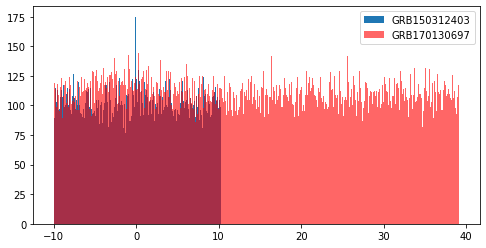

In [78]:
#print the histogram to get the photon counts
import matplotlib.pyplot as plt
t90_1 = get_t90(grbname1)
t90_2 = get_t90(grbname2)
plt.figure(figsize = (8,4))
start_1, end_1 = -10, t90_1 + 10
start_2, end_2 = -10, t90_2 + 10
n1, bins1, patches1 = plt.hist(timedf1.TTIME, bins = int((end_1 - start_1)/0.1), range = (start_1, end_1), alpha = 1, label = grbname1)
n2, bins2, patches2 = plt.hist(timedf2.TTIME, bins = int((end_2 - start_2)/0.1), range = (start_2, end_2), color = 'red', alpha = 0.6, label = grbname2)
plt.legend(loc = 'upper right')

Now `n1` and `n2` are our two light curves

In [79]:
# length of both time series
print(len(n1), len(n2))

203 491


3428.0


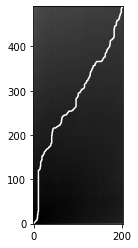

In [80]:
# Applying DTW to these light curves
from dtw import dtw
manhattan_distance = lambda x, y : np.abs(x-y)
d, cost_matrix, acc_cost_matrix, path = dtw(n1,n2, dist = manhattan_distance)
print(d)

#visualizing the plot
plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.show()

### TODO
---
1. Light Curve Simulation